The first step should be importing the needed packages and defining the function f(x) and our initial parameters 

In [ ]:
%pip install pandas
%pip install scipy
%pip install numpy
%pip install matplotlib


In [64]:
import numpy as np
import pandas as pd
from numpy import random
import scipy
import matplotlib

def func(inp):
    return 0.5*np.exp(-np.abs(inp))

func(3)
    


np.float64(0.024893534183931972)

In [60]:
def metropolis_hasting(x_0, N=10000, s=5):
    x_values = [x_0]
    for i in range(1,N):
        xi_minus1 = x_values[-1]
        x_star = random.normal(scale=s, loc=xi_minus1)
        r = func(x_star)/func(xi_minus1)
        u = random.uniform(0,1)

        if np.log(u) < np.log(r):
            x_values.append(x_star)
        else:
            x_values.append(xi_minus1)
        
    return x_values            

         

In [69]:
x_values = metropolis_hasting(x_0=0)   
x_values[1:1000]
np.mean(x_values)

np.float64(0.013206953191658318)

<function matplotlib.pyplot.show(close=None, block=None)>

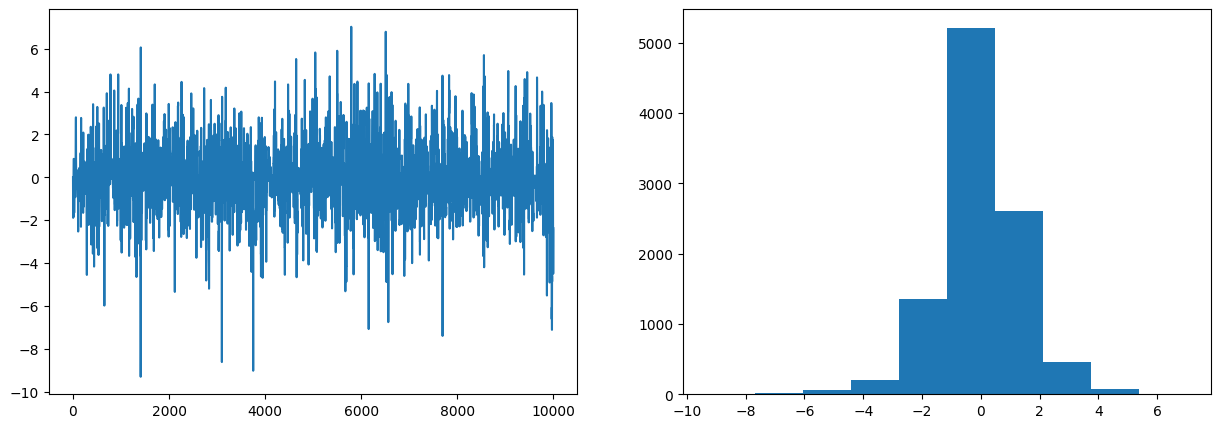

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values)

plt.subplot(1, 2, 2)
plt.hist(x_values)

plt.show

(array([1.000e+00, 8.000e+00, 5.700e+01, 3.040e+02, 1.457e+03, 5.635e+03,
        2.127e+03, 3.700e+02, 3.600e+01, 5.000e+00]),
 array([-10.02429242,  -8.23025238,  -6.43621235,  -4.64217231,
         -2.84813228,  -1.05409225,   0.73994779,   2.53398782,
          4.32802786,   6.12206789,   7.91610793]),
 <BarContainer object of 10 artists>)

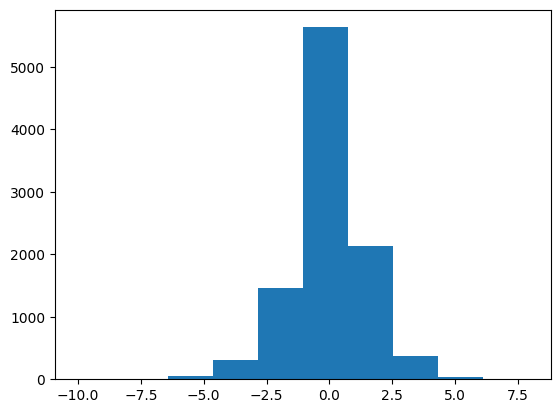

Now for the second part, we introduce chains.

In [4]:
def mean(N=10000):
    return 1/N*sum(x_values)

print("mean:", mean())

def variance(N= 10000):
    mu = mean()  
    squared_diff = [(x - mu) ** 2 for x in x_values]  # Squared differences
    return 1/N*sum(squared_diff)

print("Variance:", variance())

mean: 0.005255737763953893
Variance: 2.012956060103127


In [5]:
def multi_metropolis_hasting(J, x_0=0, N=2000, s=0.001):
    multi = []
    for i in range(J):
        chain_result = metropolis_hasting(x_0 + i, N, s)
        multi.append(chain_result)
    return multi

chains = multi_metropolis_hasting(J=4)

for i in range(1,4):
    print(chains[i][1:10])


[1.0013504871590424, 0.9996191274544917, 0.9996719759140137, 0.9994775973761993, 0.9997280428298215, 1.000089405155133, 0.9991755239362087, 1.000201230148393, 0.9991668034503478]
[1.9988409937296936, 1.9990480728047957, 1.9984942305073035, 1.998257236929094, 1.99839472431449, 1.9992360600580894, 1.9983371724248729, 1.9969101232404627, 1.9962243373220943]
[3.000498368411498, 3.001345293473279, 3.003661692852653, 3.004407714691747, 3.002767153123568, 3.0027934440925286, 3.003673396046311, 3.0051433576182216, 3.004348785728468]


In [6]:
def overall_mean(J,chains, N=2000):
    means = []
    for i in range(J):
        individual_mean = 1/N*sum(chains[i])
        means.append(individual_mean)
        print(f"mean {i+1}: {individual_mean}")
    print(f"total mean: {sum(means)/J}\n")

overall_mean(J=4, chains=chains, N=2000)


def between_variance(J, chains, N=2000):
    variances = []
    for i in range(J):
        chain_mean = 1 / N * sum(chains[i])  
        squared_diff = [(x - chain_mean) ** 2 for x in chains[i]]  
        chain_variance = sum(squared_diff) / N  
        variances.append(chain_variance)
        print(f"Variance {i+1}: {chain_variance}")
    
    total_variance = sum(variances) / J
    print(f"Overall variance: {total_variance}")
    return total_variance


between_variance(J=4, chains=chains, N=2000)
btw_var = between_variance(J=4, chains=chains, N=2000) 

def overall_variance(J, chains, N=2000):
    variances = []
    for i in range(J):
        varst = np.var(chains)
    return varst    

print(overall_variance(J=4, chains=chains, N=2000))

ovr_var = overall_variance(J=4, chains=chains, N=2000)


mean 1: -0.01082129584426041
mean 2: 1.003426305361133
mean 3: 1.995842798246302
mean 4: 2.9779489563914985
total mean: 1.4915991910386683

Variance 1: 8.828965679066803e-05
Variance 2: 0.0002719142956509836
Variance 3: 0.0004524931263977528
Variance 4: 0.0004472635023221651
Overall variance: 0.00031499014529039237
Variance 1: 8.828965679066803e-05
Variance 2: 0.0002719142956509836
Variance 3: 0.0004524931263977528
Variance 4: 0.0004472635023221651
Overall variance: 0.00031499014529039237
1.2400843216679023


In [7]:
R_hat = np.sqrt((ovr_var+btw_var)/ovr_var)

R_hat

np.float64(1.000126995455026)

In [33]:
s_values = np.linspace(0.001, 1, 1000)
R_hat_values = []

for s in s_values:
    chains = multi_metropolis_hasting(J=4, s=s, N=2000, x_0=0)
    btw_var = between_variance(J=4, chains=chains, N=2000)
    ovr_var = overall_variance(J=4, chains=chains, N=2000)
    R_hat = np.sqrt((btw_var + ovr_var) / ovr_var)
    R_hat_values.append(R_hat)



Variance 1: 0.00046823725453917965
Variance 2: 0.0002147574267686991
Variance 3: 0.00040865495596996106
Variance 4: 0.00012897966830122912
Overall variance: 0.00030515732639476724
Variance 1: 0.0014613101466238849
Variance 2: 0.001827077717698457
Variance 3: 0.00041450554978800946
Variance 4: 0.0031637572847016755
Overall variance: 0.0017166626747030067
Variance 1: 0.0012741519500828963
Variance 2: 0.006179322639365346
Variance 3: 0.0026373345207859997
Variance 4: 0.0015814099544113015
Overall variance: 0.002918054766161386
Variance 1: 0.01408060186906469
Variance 2: 0.010802652833716786
Variance 3: 0.003129971761351622
Variance 4: 0.0024550657618194415
Overall variance: 0.007617073056488135
Variance 1: 0.004509289014408079
Variance 2: 0.007525108737369765
Variance 3: 0.00305953804903705
Variance 4: 0.003840341240460529
Overall variance: 0.004733569260318856
Variance 1: 0.014561585707776364
Variance 2: 0.009224554922007579
Variance 3: 0.006025258687746292
Variance 4: 0.0242481691372161

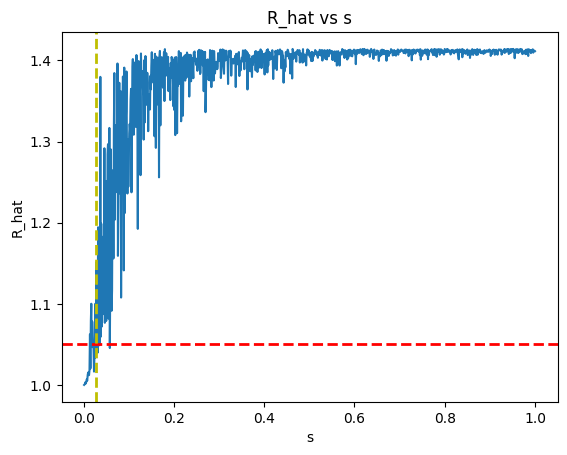

In [37]:
import matplotlib.pyplot as plt
plt.plot(s_values, R_hat_values)
plt.xlabel("s")
plt.ylabel("R_hat")
plt.title("R_hat vs s")
plt.axhline(y=1.05, color='r', linestyle='--', linewidth=2)
#plt.axvline(x=28/1000, color='y', linestyle = '--', linewidth=2)
plt.show()